### <i>Note: this source code is also available in main.py</i>

In [1]:
# -*- coding: utf-8 -*-
from objectives import * 
from read_input import *
from plotting import *
from reformulation_input import *
from evaluate_reformualtion_solution import * 

%matplotlib inline
PYTHONIOENCODING="utf-8"

D:\Software\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Define the scenario and optimize the keyboard
Here you can define: 
- the weights for each objective
- the <code>level cost</code> used in familiarity objective

In addition, the system will use the following input files from folder <code>input </code>:

##### If you want to use a different file, you can change the path in "read_input.py". For the new file, make sure to keep everything in the same format, in particular with respects to separators (mostly space, but please check). </i>

<code>azerty.csv </code><br>
<i> Do not change. </i>Defines the location of each character on the current azerty layout. Used in familiarity score.

<code>numbers.csv </code><br>
<i> Can be changed. </i>Defines the keys that are reserved for numbers. Change to fix the numbers to other keyslots (e.g. unshifted) or add other fixed characters. Characters added here will be fixed to the given keyslot and not considered in the optimization (also not influence the location of other keys).

<code>characters.txt </code><br>
<i> Can be changed. </i>A list of characters that should be mapped on the keyboard. Remove or add characters as you like. If you add a character, ensure that its probability and similarity scores are defined.
**Do not add characters from the alphabet or space.**

<code>variable_slots.csv </code><br>
A list of all free slots to which the characters can be assigned during optimization. Usually this file does not need to be changed. Any character you want to fix you can add to <code>numbers.csv</code> and will be automatically removed from this list. However, if you want to completely remove a slot from the optimization, you can do it here (e.g. <code>A03_Alt</code> to not allow any assignment to <code>Alt + Space</code>)

<code>letters.txt </code><br>
<i> Do not change. </i>A list of letters that are fixed on the keyboard according to the azerty layout (<code>azerty.csv </code>). Characters are optimized in relation to these fixed letters. Our collected data (e.g. performance data) does not allow to change this set. If you want to fix a character to a certain key, remove that character from the <code>characters.txt </code> and add it to <code>numbers.csv </code><br>. Then the key won't be considered by the optimization. However, it will also not influence the assignment of other keys

<code>distance.xlsx </code><br>
<i> Can be changed. </i>Matrix that defines the distance between two keyslots as the sum of row and column distance. An extra level cost (Shift, Alt, Alt+Shift) is taken into account in the familiarity score and can be defined in the scenario. The distance is normalized to [0,1] when reading the distance matrix. 

<code>similarity_c_c_binary.xlsx</code> and <code>similarity_c_l.xlsx</code><br>
<i> Can be changed. </i>Matrix that defines the similarity between two characters or for a character-letter pair. The similarity is given between 0 and 1. This is a symmetric score, and the value should only be filled once!

<code>performance.csv</code><br>
<i> Can be changed. </i> Defines the performance of a transition between two keys. 

<code>ergonomics_antti.csv</code><br>
<i> Can be changed. </i> Defines the ergonomics value for of a transition between two keys, as given by Antti.

<code>frequency_letters_bepo.csv</code><br>
<i> Can be changed. </i> Defines the frequency of each letter, here as used by the bepo guys. The code takes care of deadkeys. 

<code>frequency_bigrams_bepo.csv</code><br>
<i> Can be changed. </i> Defines the frequency of each bigram, here as used by the bepo guys. The code takes care of deadkeys. 

<code>all_slots.txt</code><br>
<i> Do not change. </i> Contains all keyboard slots. Only relevant for plotting. 

In [2]:
#Define the weights for:
#w_p: Performance
#w_a: Association
#w_f: Familiarity
#w_e: Ergonomics
w_p, w_a, w_f, w_e = [0.25, 0.25, 0.25, 0.25]


#Define the extra cost for the level of the keyslot added when computing the distance between two keyslots. 
# This is used in familiarity score to punish the assignment to other levels as used on azerty.
#Example: 
#level_cost = {u'':0, u'Shift':1, u'Alt':2, u'Alt_Shift':3}
#distance[E_00, E_00_Alt] = 2
#distance[E_00_Shift, E_00_Alt] = 1
level_cost = {u'':0, u'Shift':1, u'Alt':2, u'Alt_Shift':3}


### Create input for reformulation
In order for it to run fast, we need to reformulate the problem to the kaufmann-broekx reformulation. The reformulation itself is done with the C++ code provided by Andreas Karrenbauer. Here, we only prepare the input file for this code. 

In [3]:
create_reformulation_input(w_p, w_a, w_f, w_e, level_cost)

read in: characters, keyslots and letters
read in: similarity values
read in: distance values
read in: probability values
read in: ergonomics, performance
Done reading input values.
Done.


# <font color="red">Attention: now switch to C++ </font>
Before continuing, switch to C++ program in <code>"reformulation"</code> folder and run ./kaufmanbroeckx < reformulation_input.txt > reformulation.lp with a c++ compiler. 

If you switched to another computer for that, copy the prodcued file in the <code>"reformulation"</code> folder.


If you don't want to use the console, continue here. This will do the same as <code>"main_optimize_reformulation.py"</code>
### Optimize reformulation
Note: reformulation.lp must be created by Andreas' C++ code prior to calling the optimization.

Runs the optimization and saves the global optimum to a file. 
Also saves intermediate solutions to the <code> mappings </code> folder

##### <font color="red">Switch to console for faster execution, and skip the code below.</font>
I believe that solving the problem is faster in the console than in Ipython due to parallelism. Therefore, continue with running
##### <code>main_optimize_reformulation.py</code> 
in the console. Make sure to edit the file accordingly, if you have changed the weights above.

If you don't want to use the console, uncomment the lines below and continue here. This will do the same as <code>"main_optimize_reformulation.py"</code>

In [3]:
#from optimize import *
#model, mapping = optimize_reformulation("reformulation\\reformulation.lp")
#plot_mapping(mapping, plotname="optimum.png", w_p=w_p, w_a=w_a, w_f=w_f, w_e=w_e, level_cost=level_cost, quadratic=1)

NameError: name 'optimize_reformulation' is not defined

### If you have stopped the optimization before it terminated:
The third last column (or so) in the console output gives you the Gap between the score of the current best solution and the global optimum. You can probably stop the code after one day of running, if the gap is below 1% or so. 

Then run the following code to :
- put the best found mapping in a human readable format that can also be easily modified, and
- produce the graph with objectives

Output will be stored in the <code> mappings </code> folder

{u"c'h": u'E02_Alt', u'\u2030': u'B07_Alt', u'...': u'C12_Alt_Shift', u'\u2264': u'C04_Alt_Shift', u'\u030fd': u'B03_Alt_Shift', u'\u20ac': u'D03_Alt_Shift', u'\xf0': u'E10_Alt', u'\xde': u'C05_Alt', u'{': u'C01_Alt_Shift', u'~d': u'E01_Alt_Shift', u'\xa8d': u'D11_Shift', u"C'h": u'E08_Alt', u'!': u'B08_Shift', u'#': u'E04_Alt', u'"': u'E04', u'%': u'C11', u'$': u'C02_Alt', u"'": u'B07', u'&': u'E02', u')': u'E10', u'(': u'E05', u'\xab': u'B10_Shift', u'*': u'C12', u'-': u'E06', u',': u'E07_Alt_Shift', u'/': u'B09_Shift', u'.': u'B08', u'\xb1': u'C06_Alt', u'\u02ddd': u'B04_Alt', u'\xb2': u'D02_Alt_Shift', u'\xb5': u'C10_Alt_Shift', u'_': u'E08', u'\u02dbd': u'B06_Alt', u'\\': u'B09_Alt', u';': u'E07', u':': u'B09', u'=': u'E09', u'<': u'B00_Shift', u'?': u'B07_Shift', u'>': u'B02_Alt', u'\xc0': u'E01_Alt', u'`d': u'E07_Alt', u'\xc6': u'D01_Alt', u'\xc9': u'D03_Alt', u'\xa3': u'D10_Alt_Shift', u'\xb8d': u'D06_Alt', u'\xa1': u'E12', u'\xd0': u'E03_Alt', u'\u0153': u'D09_Alt', u'\u0152':

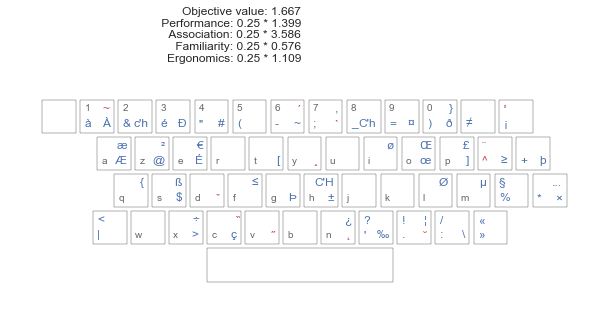

In [3]:
evaluate_optimized_reformulation(w_p, w_a, w_f, w_e, level_cost)

'_scenario1'

### To compute the objectives for a given mapping:
Given a mapping (dict from characters to keyslots) we can compute the values for each objective. 
The mapping can be given in form of a file path, either to a .txt file for which the format is 
"letter key"
or to ".mst" file created from optimizing the reformulation. 

mappings\solution_0.0224.mst
read in: characters, keyslots and letters
read in: similarity values
read in: distance values
Done reading input values.
À: 0.00738
@: 0.00369
Ø: 0.00572
ß: 0.00010
à: 0.00789
é: 0.01675
ø: 0.00572
linear Association: 0.0472
!, ¡: 0.00000
(, ): 0.00008
[, ]: 0.00000
é, É: 0.00009
=, ≠: 0.00000
C'H, C'h: 0.00000
%, ‰: 0.00000
c'h, C'h: 0.00000
?, ¿: 0.00000
´d, `d: 0.00001
., :: 0.00006
|, ¦: 0.00000
>, ≥: 0.00000
{, }: 0.00000
-, _: 0.00003
Þ, þ: 0.00000
~d, ~: 0.00000
+, ±: 0.00000
<, >: 0.00000
ø, Ø: 0.00000
c'h, C'H: 0.00000
', ": 0.00019
Ð, ð: 0.00000
<, ≤: 0.00000
linear Association: 0.0005


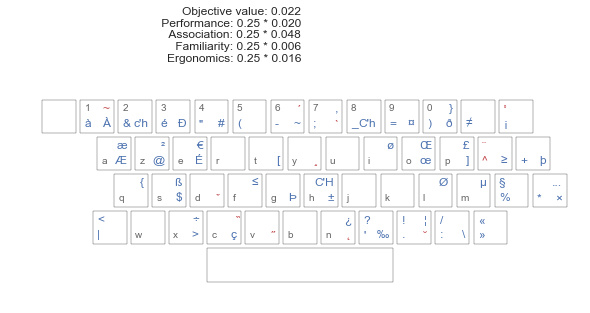

In [3]:
#You can directly use the plot_mapping function:
path = "mappings\\solution_0.0224.mst"
plot_mapping(path, plotname=path+".png", w_p=w_p, w_a=w_a, w_f=w_f, w_e=w_e, level_cost=level_cost, quadratic=1)      

##### Evaluate the bépo layout in the same way
we only plot azerty-like layouts at the moment, so we'll only compute the objective scores for bépo and write them out. 

Note: the <code> mappings </code> folder only contains the optimized mappings. Other layouts should be stored in <code> input/layouts </code>

In [4]:
path = "input\\layouts\\bepo.txt"
mapping = create_map_from_txt(path)
objective, p, a, f, e = get_objectives(mapping, w_p, w_a, w_f, w_e, level_cost, quadratic=1)
print "Bépo score: %f\n Performance: %f\n Association: %f\n Familiarity: %f\n Ergonomics: %f\n"%(objective, p, a, f, e)

read in: characters, keyslots and letters
read in: similarity values
read in: distance values
Done reading input values.
˙ not in the to-be-mapped character set
— not in the to-be-mapped character set
‘ not in the to-be-mapped character set
“ not in the to-be-mapped character set
† not in the to-be-mapped character set
™ not in the to-be-mapped character set
¯d not in the to-be-mapped character set
″ not in the to-be-mapped character set
Ĳ not in the to-be-mapped character set
4 not in the to-be-mapped character set
· not in the to-be-mapped character set
8 not in the to-be-mapped character set
` not in the to-be-mapped character set
d not in the to-be-mapped character set
h not in the to-be-mapped character set
l not in the to-be-mapped character set
d^ not in the to-be-mapped character set
p not in the to-be-mapped character set
t not in the to-be-mapped character set
x not in the to-be-mapped character set
space not in the to-be-mapped character set
¨ not in the to-be-mapped charact

KeyError: (u';', u'C05_Shift')

##### Note if you want to evaluate azerty, please use the <code> get_azerty() </code> method to get the corresponding mapping: 

In [ ]:
mapping = get_azerty()
plot_mapping(mapping, plotname="azerty.png", w_p=w_p, w_a=w_a, w_f=w_f, w_e=w_e, level_cost=level_cost, quadratic=1)      
